# Model Explainability Experimentation

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import xgboost
import shap
from sklearn.model_selection import train_test_split

In [2]:
from data_ingestion.ingest import get_data, get_target_feature
from parameters.params import data_file_path, target_feat, boston_data_file_path

<br>

## Data Ingestion

In [3]:
data = get_data(boston_data_file_path)
data.shape

(506, 15)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [5]:
data = data.drop('Unnamed: 14', axis='columns')
features = data.columns

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features], 
    data['TAX'], 
    test_size=0.3,
    random_state=1)

In [7]:
d_param = {
    "learning_rate": 0.01
}

model = xgboost.train(params=d_param,
                      dtrain=xgboost.DMatrix(X_train, label=y_train), 
                      num_boost_round=1000)

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [9]:
i = 0
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train.iloc[i,:])

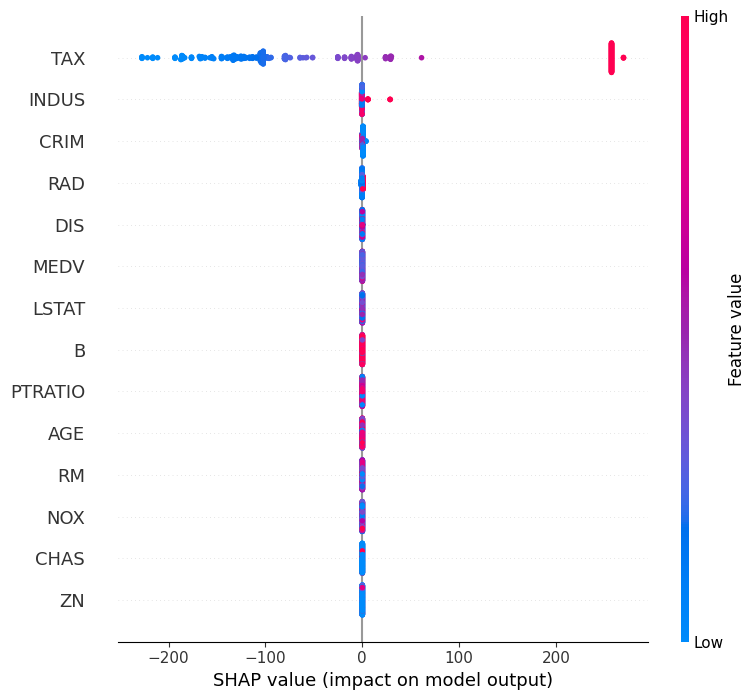

In [10]:
shap.summary_plot(shap_values, X_train)

<br>